<a href="https://colab.research.google.com/github/anushree1125/INTERN_SparkFoundation/blob/main/Task_1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @ SPARKS FOUNDATION**

**Author: Anushree M**                                                 
Task-1:Prediction using supervised machine learning                             
Link to dataset :https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv  


                                
Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# **Step 1:Reading dataset**

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Step 2: Data visualization**

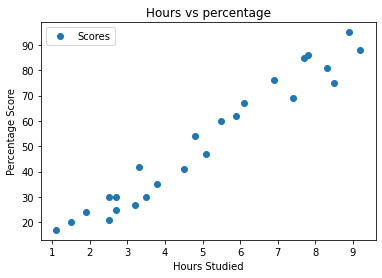

In [6]:
#Plotting distribution of scores
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph it is clear that there is a positive linear regression between the numbers of hours studied and percentage of score.**

# **Step 3: Preparing data**                                                   
Dividing data into attributes(inputs) and labels(outputs)

In [9]:
x=data.iloc[:,:-1].values   #converted to numpy array #all rows except last column #iloc to read values #last column label
y=data.iloc[:,1].values
#print(x) #dataframe 2 
#print(y)

Splitting data into traning and test sets using scikit-learns built in train_test_split() method

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

# **Step 4: Training the algorithm**     
After splitting data into training and testing sets now it's our time to train our algorithm

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)
print("Training complete")


Training complete


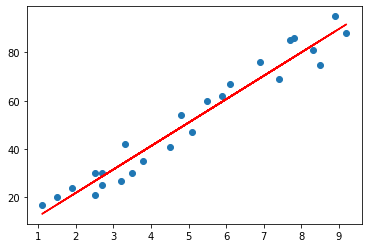

In [24]:
#Plotting regression line
line=model.coef_*x + model.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.show()

**Step 5: Making Predictions**           
After training our algorithm, it's time to make some pridictions.

In [28]:
#Testing data - In hours
print(x_test)
#predicting the scores
y_pred = model.predict(x_test)
print("Predicted values: ")
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]
Predicted values: 
[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


# **Step 7: Comparing actual result to the predicted model result**

In [26]:
#Comparing actual vs predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [33]:
#Testing our own data
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523316


In [29]:
#Estimating traning and test score
print("Training Score: ",model.score(x_train,y_train))
print("Train Score: ",model.score(x_test,y_test))

Training Score:  0.9501107277744313
Train Score:  0.9555700801388127


# **Evaluating the model**

In [34]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.691397441397446
Mean Squared Error: 25.463280738222593
Root Mean Squared Error: 5.046115410711748
R-2: 0.9555700801388128
